<a href="https://colab.research.google.com/github/raulcodec/crawler/blob/master/WebScraping101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content on the web is of two kinds -

1. Static Content (Text in HTML tags , CSS , js Links etc)
2. Dynamic Content ( Images or Text rendered from Javascript* , AJAX scripts**. Usually gets rendered on user action) 

**Static Content** is easy to scrape since it is embedded within the source of web page at the time of development.Web Scraping for such content can be made generic across sites , since they all follow similar structure of tags  (Title , paragraph etc) and follow DOM***


**Dynamic Content** needs a lot more inspection. Its a Server side language that return dymnamically generated HTML .Usually it requires a tool to mimick user action behaviour ( Selenium etc) to render the page and then requires introspection into the html CSS or other syles used. This cannot be made generic across sites and depends on each web page to web page


*https://www.w3schools.com/js/

** https://www.w3schools.com/xml/ajax_intro.asp

*** https://www.w3.org/TR/WD-DOM/introduction.html

In [4]:
#Importing Libraries
import requests
from bs4 import BeautifulSoup

URL = "https://fossbytes.com/10-best-free-music-websites-to-download-songs-legally/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

In [3]:
soup.title

<title>15 Best Free Music Websites To Download Songs Legally In 2021</title>

**Finding all text in Paragraph (p) tags**

In [52]:
all_text = []
for text in soup.find_all('p'):
   all_text.append(text.getText())
all_text

['Top X',
 'Download songs for free and start grooving!',
 'The internet offers a lot of things and among them is free music. You can find plenty of websites that let you download music for free; however, not all of them are legal. So if you are looking for songs that can be availed safely and free of cost, we have handpicked the best free music websites in 2021 for you.',
 'There are lots of people who aren’t sure where to download free music from or how to download songs. To help you out, I have created the following list of the best free music download sites in 2021. Just visit the links given below and look for download symbols. These sites will offer you free music downloads with just a single click.',
 'Before we dive deep into pros and cons of different free-of-cost resources, here’s a quick list of top websites —',
 'Before going to check out these music sites, do take a look at our other lists of free and legal services:',
 'SoundCloud\xa0is one of the popular music sites that

**Listing out all text in Header Tags**

In [57]:
h_list = []
headings = ['h1','h2','h3','h4']
for h in soup.find_all(headings):
  h_list.append(h.getText())
h_list


['15 Best Free Music Websites To Download Songs Legally In 2021',
 'How to download music for free?',
 'Top 15 Music Download Websites | 2021',
 '1. SoundCloud',
 'How to download free songs on Soundcloud?',
 '2.\xa0ReverbNation',
 'How to download free songs on ReverbNation?',
 '3. Jamendo',
 '4. SoundClick',
 '5. Audiomack',
 '6. Audionautix',
 '7. NoiseTrade',
 '8. Beatstars',
 '9. Free Amazon Music Store',
 '10. Internet Archive (Audio Archive)',
 '11. DatPiff',
 '12. Last.fm',
 '13. CCTrax',
 '14. YouTube',
 '15. Free Music on Google Play Store',
 'Listen to free music in 2021',
 'Download free music and start grooving!',
 'Best sites to download Hindi songs for free and legally',
 'Free Music Download FAQs',
 'Manisha Priyadarshini',
 '\n\n10 Best Electric Cars To Buy In The U.S. In 2021 Instead Of Gasoline Cars \n',
 '\n\n10 Best Facebook Alternatives With Focus On Privacy For 2021 \n',
 'Most Popular Lists',
 '\n\n25 Gaming Terms And Slangs Every Gamer Must Know \n',
 '\n\nThes

**Capturing the Tabular data from webpage**

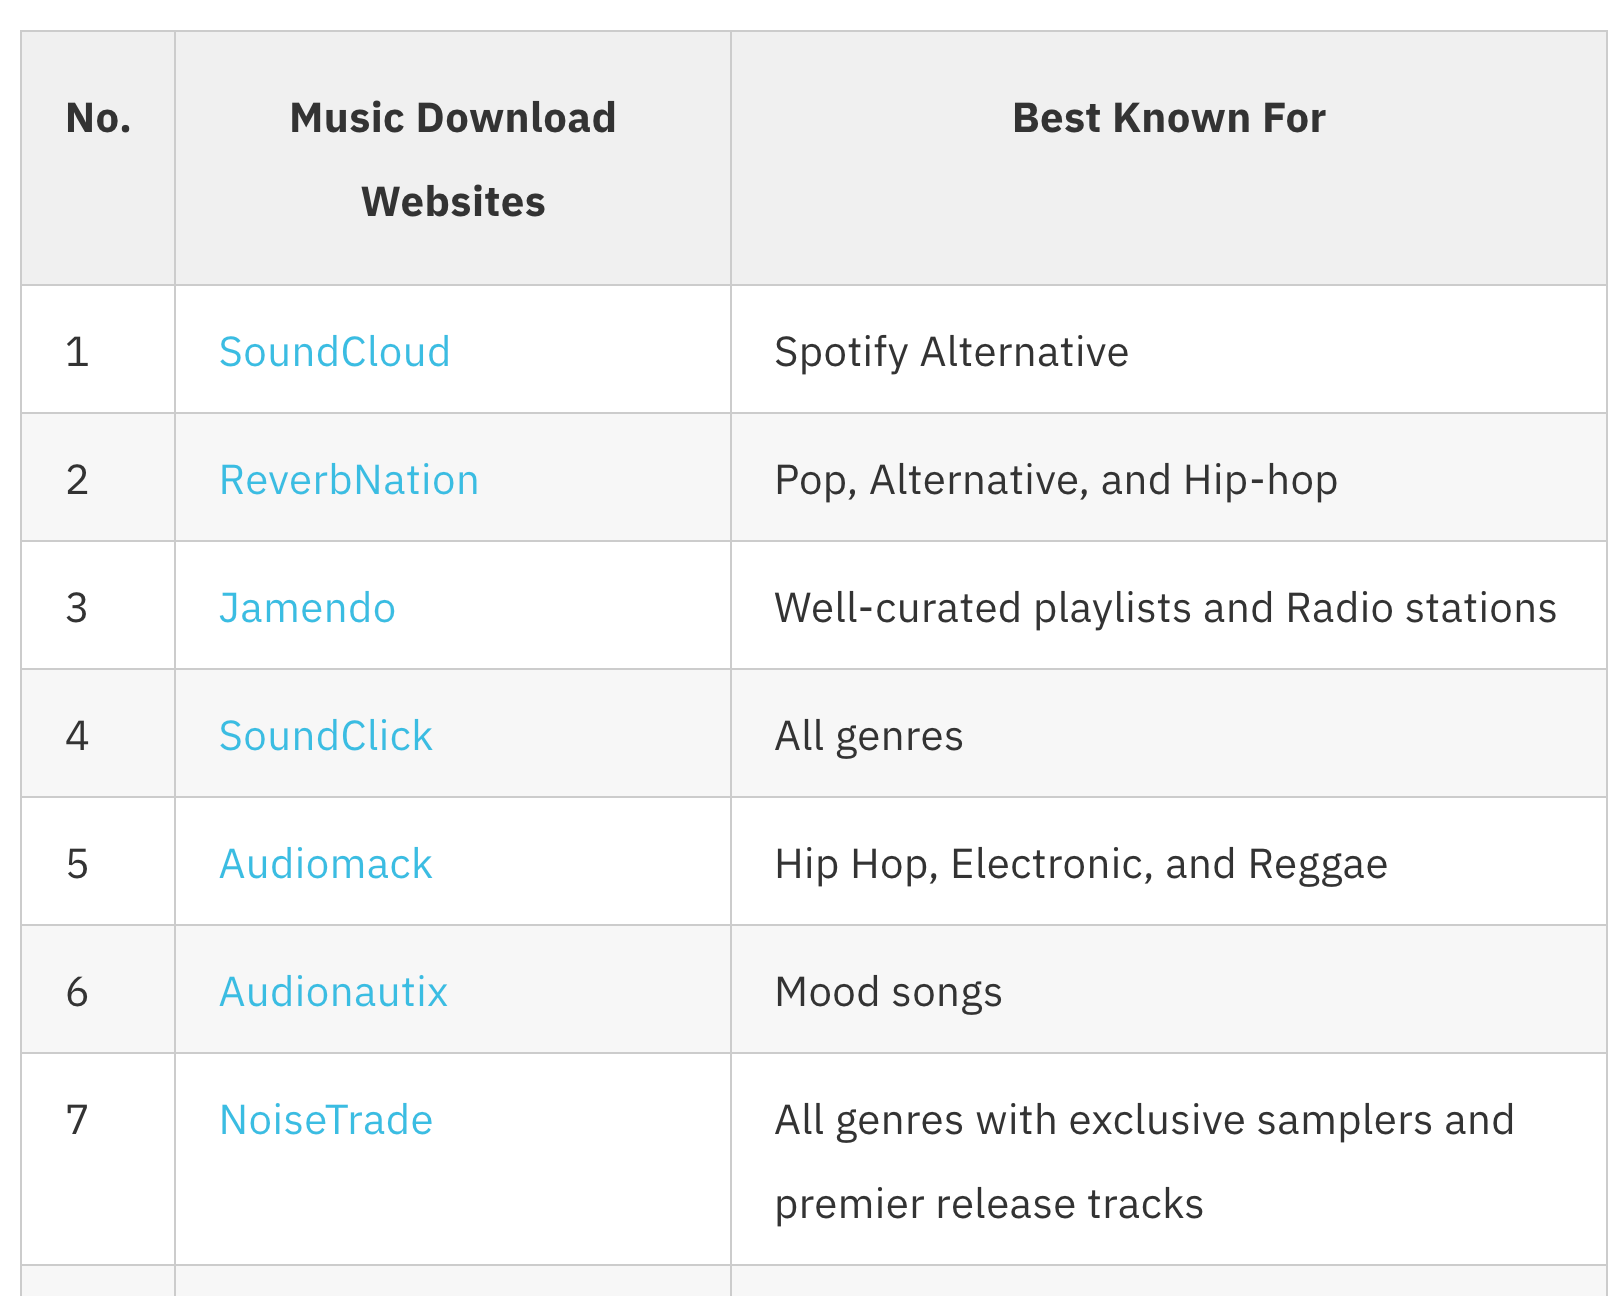




In [50]:
#Contents only in Table Header
th_list = []
for h in soup.find_all('th'):
  th_list.append(h.getText())
th_list

['No.', 'Music Download Websites', 'Best Known For']

In [31]:
#Contents in Table Details
td_list = []
for h in soup.find_all('td'):
  td_list.append(h.getText().strip().split('\n'))
td_list

[['1'],
 ['SoundCloud'],
 ['Spotify Alternative'],
 ['2'],
 ['ReverbNation'],
 ['Pop, Alternative, and Hip-hop'],
 ['3'],
 ['Jamendo'],
 ['Well-curated playlists and Radio stations'],
 ['4'],
 ['SoundClick'],
 ['All genres'],
 ['5'],
 ['Audiomack'],
 ['Hip Hop, Electronic, and Reggae'],
 ['6'],
 ['Audionautix'],
 ['Mood songs'],
 ['7'],
 ['NoiseTrade'],
 ['All genres with exclusive samplers and premier release tracks'],
 ['8'],
 ['Free Amazon Music Store'],
 ['Free music downloads for offline listening'],
 ['9'],
 ['Beatstars'],
 ['Hip Hop, EDM, Lo-fi'],
 ['10'],
 ['Internet Archive (Audio Archive)'],
 ['Audiobooks, podcasts, radio programs, and live music'],
 ['11'],
 ['DatPiff'],
 ['Hip-Hop and Rap songs'],
 ['12'],
 ['Last.fm'],
 ['Well curated Radio Stations'],
 ['13'],
 ['CCTrax'],
 ['Electronica, Dub, Techno, Ambient'],
 ['14'],
 ['YouTube'],
 ['All Genres'],
 ['15'],
 ['Free Music on Google Play Store'],
 ['All Genres']]

**For obtaining structured Content , we use Table Row (tr) and obtain corresponding links using href tag**

In [36]:
tr_list = []
for tr in soup.find_all('tr'):
  for a in tr.find_all('a', href=True):
    all_text = str(tr.getText().strip()+'\n'+a['href'])
    tr_list.append(all_text.split('\n'))

tr_list

[['1', 'SoundCloud', 'Spotify Alternative', 'https://soundcloud.com/stream'],
 ['2',
  'ReverbNation',
  'Pop, Alternative, and Hip-hop',
  'https://www.reverbnation.com/'],
 ['3',
  'Jamendo',
  'Well-curated playlists and Radio stations',
  'https://www.jamendo.com/'],
 ['4', 'SoundClick', 'All genres', 'https://www.soundclick.com/'],
 ['5',
  'Audiomack',
  'Hip Hop, Electronic, and Reggae',
  'https://audiomack.com/'],
 ['6', 'Audionautix', 'Mood songs', 'https://audionautix.com/'],
 ['7',
  'NoiseTrade',
  'All genres with exclusive samplers and premier release tracks',
  'https://www.pastemagazine.com/noisetrade/music/'],
 ['8',
  'Free Amazon Music Store',
  'Free music downloads for offline listening',
  'https://www.amazon.com/s?rh=n%3A334897011&brr=1&rd=1'],
 ['9', 'Beatstars', 'Hip Hop, EDM, Lo-fi', 'https://www.beatstars.com/'],
 ['10',
  'Internet Archive (Audio Archive)',
  'Audiobooks, podcasts, radio programs, and live music',
  'https://archive.org/details/audio'],
 ['

**Converting to Pandas dataframe , for neat structure**

In [51]:
import pandas as pd
th_list.append('URL')
df_data = pd.DataFrame(tr_list, columns=th_list)
df_data

,No.,Music Download Websites,Best Known For,URL
0,1,SoundCloud,Spotify Alternative,https://soundcloud.com/stream
1,2,ReverbNation,"Pop, Alternative, and Hip-hop",https://www.reverbnation.com/
2,3,Jamendo,Well-curated playlists and Radio stations,https://www.jamendo.com/
3,4,SoundClick,All genres,https://www.soundclick.com/
4,5,Audiomack,"Hip Hop, Electronic, and Reggae",https://audiomack.com/
5,6,Audionautix,Mood songs,https://audionautix.com/
6,7,NoiseTrade,All genres with exclusive samplers and premier...,https://www.pastemagazine.com/noisetrade/music/
7,8,Free Amazon Music Store,Free music downloads for offline listening,https://www.amazon.com/s?rh=n%3A334897011&brr=...
8,9,Beatstars,"Hip Hop, EDM, Lo-fi",https://www.beatstars.com/
9,10,Internet Archive (Audio Archive),"Audiobooks, podcasts, radio programs, and live...",https://archive.org/details/audio


In [53]:
#Writing data to CSV
df_data.to_csv('alternative_music_sites.csv',sep='|')

In [63]:
complete_text = h_list+all_text
complete_text

import csv
with open('site_text.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(complete_text) 